# Edge and Corner Detection Methods

## Images Provided

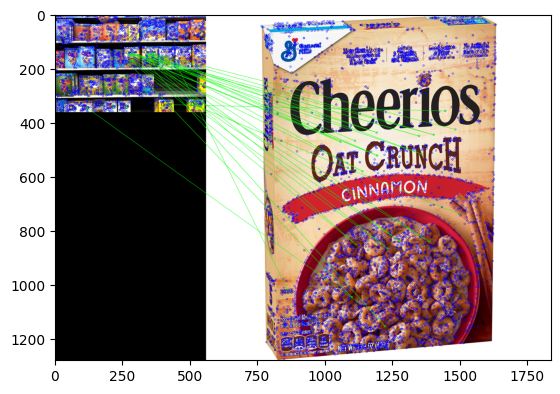

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

image = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/images/store_shelf.png', cv.IMREAD_REDUCED_COLOR_2)

template = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/images/oat_crunch.jpg', cv.IMREAD_REDUCED_COLOR_2)

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(image, None)
kp2, des2 = sift.detectAndCompute(template, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50) # or pass empty dictionary
flann  = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Need to draw onlyb good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i] = [1,0]

draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(image, kp1, template, kp2,  matches, None, **draw_params)
plt.imshow(cv.cvtColor(img3,cv.COLOR_BGR2RGB))
plt.show()


In [3]:
print(f"Number of keypoints in first image: {len(kp1)}")
print(f"Number of keypoints in second image: {len(kp2)}")

Number of keypoints in first image: 2409
Number of keypoints in second image: 5864


## Custom Images

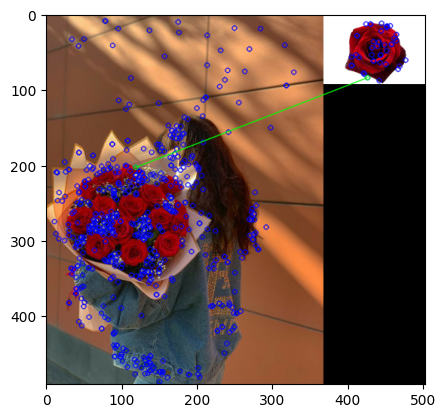

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

image = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/images/rose_flowers.jpeg', cv.IMREAD_REDUCED_COLOR_2)

template = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/images/rosse.jpeg', cv.IMREAD_REDUCED_COLOR_2)

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(image, None)
kp2, des2 = sift.detectAndCompute(template, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50) # or pass empty dictionary
flann  = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Need to draw onlyb good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i] = [1,0]

draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(image, kp1, template, kp2,  matches, None, **draw_params)
plt.imshow(cv.cvtColor(img3,cv.COLOR_BGR2RGB))
plt.show()


In [11]:
print(f"Number of keypoints in first image: {len(kp1)}")
print(f"Number of keypoints in second image: {len(kp2)}")

Number of keypoints in first image: 557
Number of keypoints in second image: 42
